In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint

In [12]:
class tuningAIMD:
    def __init__(self, initial_cwnd=None, num_users=2, capacity=10):
        # Create a list of lists to store cwnd values for each flow
        # User may provide a list (with length: num_users) containing initial cwnd values, otherwise random values for initial cwnd are generated
        
        # Assign initial cwnd values provided by the user
        if initial_cwnd and len(initial_cwnd)==num_users:
            self.cwnd = [[initial_cwnd[i]] for i in range(num_users)]
        # Exit if initial cwnd list length does not correspond with the number of users
        elif initial_cwnd and len(initial_cwnd)!=num_users:
            print('Size of initial cwnd list provided does not correspond with number of users!')
            return -1
        # Generate random values for each user's initial cwnd
        else:
            # seed(1)
            self.cwnd = [[randint(1, capacity)] for i in range(num_users)]

        print(f'Initial flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        self.num_users = num_users
        self.capacity = capacity

    def plot_simulation(self):
        # only when num_users=2, we plot each user's allocation on each axis (x-axis, y-axies)
        if (self.num_users == 2):
            plt.figure(figsize = (8, 8))

            plt.plot(self.cwnd[0], self.cwnd[1], '-o', label='AIMD Iterates')
            plt.xlabel('User 1\'s Allocation, X1')
            plt.ylabel('User 2\'s Allocation, X2')
            plt.title('AIMD Algorithm Simulation')

            plt.plot([0,self.capacity], [0,self.capacity], '--', label='Fairness Line')
            plt.plot([0,self.capacity], [self.capacity,0],'-', label='Efficiency Line')

            plt.grid()
            plt.legend()
            plt.show()
        
        # Plotting of flows' cwnd against RTT
        plt.figure(figsize = (8, 8))        
        for flow in range(self.num_users):
            plt.plot(self.cwnd[flow], '-o', label=f'Flow {flow+1}')
        plt.xlabel('RTT')
        plt.ylabel('cwnd')

        plt.grid()
        plt.legend()
        plt.show()

    def run_simulation(self, alpha=1, beta=0.5, max_iteration=100):
        # Run for max_iterations
        for i in range(max_iteration):
            # Check if user's total allocation is within capacity
            if sum(self.cwnd[flow][-1] for flow in range(self.num_users)) <= self.capacity:
                # Proceed with Additive Increase
                for flow in self.cwnd:
                    new_flow_value = flow[-1] + alpha
                    flow.append(new_flow_value)
                print(f'Interation {i}: Additive Increase. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
            
            # Otherwise, if user's total allocations exceeds capacity of the link
            else:
                # Proceed with Multiplicative Decrease
                for flow in self.cwnd:
                    new_flow_value = flow[-1] * beta
                    flow.append(new_flow_value)
                print(f'Interation {i}: Multiplicative Decrease. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        # Displaying the final values 
        print('==== Final Values ====')
        for flow in range(len(self.cwnd)):
            print(f'User {flow+1}: {self.cwnd[flow][-1]}')

        # Plot
        self.plot_simulation()

    

Experiments

Initial flow allocations: [3, 10]
Interation 0: Multiplicative Decrease. New flow allocations: [1.5, 5.0]
Interation 1: Additive Increase. New flow allocations: [2.5, 6.0]
Interation 2: Additive Increase. New flow allocations: [3.5, 7.0]
Interation 3: Multiplicative Decrease. New flow allocations: [1.75, 3.5]
Interation 4: Additive Increase. New flow allocations: [2.75, 4.5]
Interation 5: Additive Increase. New flow allocations: [3.75, 5.5]
Interation 6: Additive Increase. New flow allocations: [4.75, 6.5]
Interation 7: Multiplicative Decrease. New flow allocations: [2.375, 3.25]
Interation 8: Additive Increase. New flow allocations: [3.375, 4.25]
Interation 9: Additive Increase. New flow allocations: [4.375, 5.25]
Interation 10: Additive Increase. New flow allocations: [5.375, 6.25]
Interation 11: Multiplicative Decrease. New flow allocations: [2.6875, 3.125]
Interation 12: Additive Increase. New flow allocations: [3.6875, 4.125]
Interation 13: Additive Increase. New flow allocations:

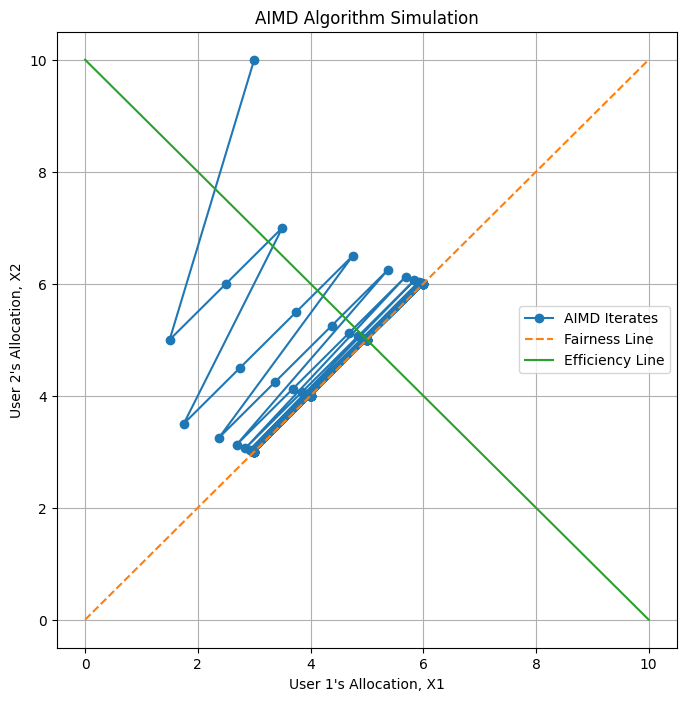

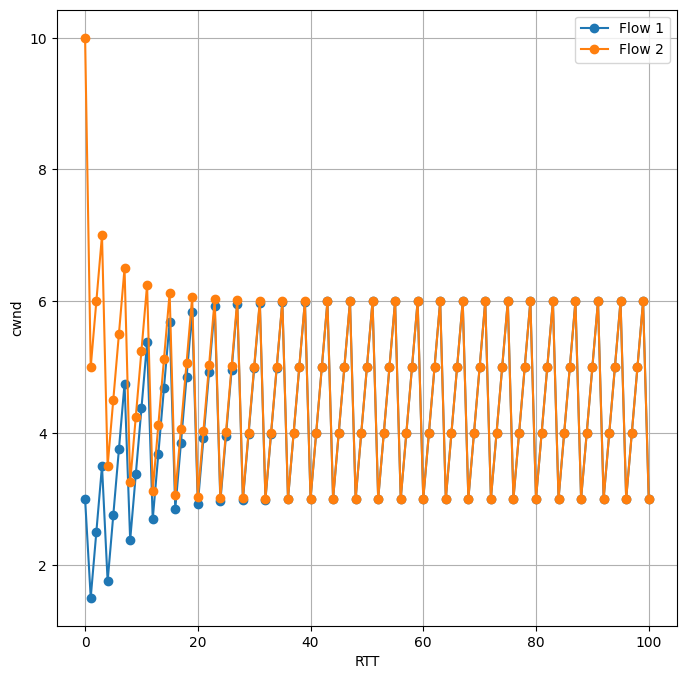

In [15]:
seed(1)
e1 = tuningAIMD()
e1.run_simulation()

Rough Work